#  Perceptron, Logistic Regression , Stocashtic Gradient Descent

**Acknowledgment**: Noah Smith, Chris Ketelsen, Chenhao Tan 

**Please put your name and cuidentity username.**

**Name**:Toshal Ghimire

In [189]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

### [40 points] Problem 1 : Perceptron Training

Consider a binary classification problem on following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

**Part 1 [5 points]** : Complete the *perceptron_train* function and report the results.

In [190]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])

data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weight = np.array([0, 0.5, 0.5])
# weight = np.array([0, 0, 0]) # test with other initial weights

bias = 1


In [191]:
def calcuateOutput(weight,bias,x):
    #   a = np.dot(weight,x) + bias
    output = 1 if a >= 0 else -1
    return output


def perceptron_train(data, weight, bias, random=False):
    """
    apply transformation and update weights and bias\
    :type X: array
    :type y: int
    :type weight: array
    :type bias : int
    :rtype: weight, bias,number of mistakes
    """
    mistakes_count = 0
    
    # For randomizing data
    if random:
        np.random.shuffle(data)
     
   
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        # YOUR CODE HERE
    
        a = np.dot(weight,X) + bias
        

        if(a * y <= 0):
            weight = weight + np.dot(y,X)
            bias = bias + y
            mistakes_count +=1
        
        '''
        PREVIOUS CODE <PLEASE IGNORE>
        
        output = calcuateOutput(weight,bias,X)
        
        error = y - output
        
        if (error != 0):
            mistakes_count +=1
            
            
        for ii in range(len(weight)):
            weight[ii] = weight[ii] + error*LEARNING_RATE*X[ii]
        
        #weight[0] += error*LEARNING_RATE *X[0] # updating weight 1
        #weight[1] += error*LEARNING_RATE *X[1] # updating weight 1
        #weight[2] += error*LEARNING_RATE *X[2] # updating weight 1
     
            bias += LEARNING_RATE * error
            '''

        #printDebug(X,y,prediction,bias,error,weight) # debug printer

    return weight, bias, mistakes_count

def printDebug(X,y,prediction,bias,error,weight):
    print("\nX: ",X, "\ty: ",y)
    print("Actual: ",y,"\tPrediction: ",prediction)
    print("Error: ", error)
    print("Bias: ",bias)
    print("Weights: ", weight)
   


In [192]:
# running taining algroithim
weight, bias, number_of_mistakes = perceptron_train(data, weight, bias)

In [193]:
print("Bias: ",bias)
print("Weights: ", weight)
print("Number of mistakes: ", number_of_mistakes)



Bias:  0
Weights:  [ 1.  -0.5  0.5]
Number of mistakes:  5


**Part 1: Continued** Report weight, bias and number of mistakes after one epoch.

**The following are the data found from one epoch:**

    Bias:  1

    Weights:  [ 1.  -0.5  0.5]

    Number of mistakes:  5

In [194]:
# for grading - ignore

Run the perceptron training for 50 epochs with updated weights and report the weight, bias.

In [195]:
# RESET DATA
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])

data = np.transpose(data)
weight = np.array([0, .5,.5])
bias = 1
epochs = 50


# RUN TEST 
def train_data(data,weight,bias,epochs,randomize=False):
    weight,bias,mistakes_count = perceptron_train(data,weight,bias,randomize)
    print("Epoch ",1,"->\tWeight:",weight,"\t\tBias:", bias,"\t\tMistakes:",number_of_mistakes)

    
    for ii in range(epochs-1):
        if(ii % 10 == 0 and ii != 0):
            print("Epoch ",ii,"->\tWeight:",weight,"\t\tBias:", bias,"\t\tMistakes:",number_of_mistakes)

        weight,bias,mistakes_count = perceptron_train(data,weight,bias,randomize)
        
    print("Epoch ",epochs,"->\tWeight:",weight,"\t\tBias:", bias,"\t\tMistakes:",number_of_mistakes)
    
    return weight,bias,mistakes_count

print("== RUNING Training algorithm (Not randomized version) ==\n")
weight,bias,mistakes_count = train_data(data,weight,bias,epochs,False)      


print("\n\n== RUNING Training algorithm (randomized version) ==\n")
weight,bias,mistakes_count = train_data(data,weight,bias,epochs,True)  


== RUNING Training algorithm (Not randomized version) ==

Epoch  1 ->	Weight: [ 1.  -0.5  0.5] 		Bias: 0 		Mistakes: 5
Epoch  10 ->	Weight: [ 1.   0.5  0.5] 		Bias: -1 		Mistakes: 5
Epoch  20 ->	Weight: [ 1.   0.5  0.5] 		Bias: -1 		Mistakes: 5
Epoch  30 ->	Weight: [ 1.   0.5  0.5] 		Bias: -1 		Mistakes: 5
Epoch  40 ->	Weight: [ 1.   0.5  0.5] 		Bias: -1 		Mistakes: 5
Epoch  50 ->	Weight: [ 1.   0.5  0.5] 		Bias: -1 		Mistakes: 5


== RUNING Training algorithm (randomized version) ==

Epoch  1 ->	Weight: [ 1.   0.5  0.5] 		Bias: 0 		Mistakes: 5
Epoch  10 ->	Weight: [ 1.   0.5 -0.5] 		Bias: 0 		Mistakes: 5
Epoch  20 ->	Weight: [ 0.   0.5  1.5] 		Bias: 1 		Mistakes: 5
Epoch  30 ->	Weight: [ 1.  -0.5 -1.5] 		Bias: -2 		Mistakes: 5
Epoch  40 ->	Weight: [ 0.   0.5  1.5] 		Bias: 1 		Mistakes: 5
Epoch  50 ->	Weight: [ 0.   0.5  1.5] 		Bias: 1 		Mistakes: 5


In [196]:
# for grading - ignore

**Part 2:** Is it possible that your Perceptron classifier would 
    ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
    Clearly explain your reasoning.

**Part 3:** Does the Perceptron classifier necessarily make the same number of mistakes after one epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

####  Part 4: Perceptron Classifier on random generated data:
Using the Implementation in Part 1, Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the Perceptron class below.

In [197]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class. Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias to zero
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0
        self.to_average = []
    
    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """
        
        LEARNING_LIMIT = 1 # it is set to one so outcome is unchanged
        global_error = 0

        for ii in range(1,max_epochs+1): 
            self.num_mistakes = 0
            
            # Randomizing both lables and features
            RANDOMIZE = list(zip(self.X_train, self.y_train))
            np.random.shuffle(RANDOMIZE)
            self.X_train, self.y_train = zip(*RANDOMIZE)
            
            
            for row in range(len(self.X_train)):
                a = np.dot(self.w,self.X_train[row]) + self.b
                
                if(a * self.y_train[row] <= 0):
                    self.w = self.w + np.dot(self.y_train[row],self.X_train[row])
                    self.b = self.b + self.y_train[row]
                    self.num_mistakes +=1
                    
            #Printing every 10th epoch
            if (ii % 10 == 0):
                print("Epoch: ",ii,"\tweight:",self.w,"\tbias:",self.b, "\tMistakes:",self.num_mistakes) 
            
            self.to_average.append(self.num_mistakes)
            
            if (self.num_mistakes == 0):
                print("\nAfter",ii, "epochs, The algroithm was able to find weights (",self.w,") and bias ",self.b,"with",self.num_mistakes,"mistakes.")
                return
            
                
            
               
        # weight determines the slope of the line, bias moves it left or right         

       


    def predict(self,features,weight):
        activation = np.dot(features,weight) + self.b        
        output = 1 if activation >= 0 else -1
        return output
        
    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        #print("Before plot_model:\n",self.X_train)
    
        ''' X_traintoPlot = []
        for xt in self.X_train:
            X_traintoPlot.append(list(xt))'''
            
        
        #print("after plot_model:\n",self.X_train)
        #print("\nextend list:\n",X_traintoPlot)
        self.X_train = np.array(self.X_train)

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ##ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)

        ''' 
        == for IF statment below ==
        plot y = mx + b 
        m: slope or gradient
        b: the y intercept 

        weight determines the slope of the line, bias moves it left or right         
        
        ''' 
        if decision_boundary:
            #self.train()
            
            # 20 X VALUES FROM -1 to 1 
            xplot = np.linspace(-1, 1, 20)
            
            # LINE EQUATION
            #yplot = -self.w[0]/self.w[1]*xplot + self.b
            yplot = -(self.w[0]*xplot + self.b) /self.w[1]

            
            ax.plot(xplot, yplot, lw=3, color="black")

            
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]
    
    def use_sklearn(self):
        '''
        Function is not used in actual answer its for myself to compare values
        
        '''
        from sklearn.linear_model import Perceptron
        perc = Perceptron(n_iter=100, alpha=0.0, shuffle=True)
        perc.fit(self.X_train, self.y_train)
        
        w, b = perc.coef_[0], perc.intercept_[0]
        print("== Using Sklearn ==")
        print("Weight:",w,"\tBias:",b)
        
        
        

**Part 4 A**: The Perceptron class above has the capability to generate it's own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the margin parameter (good values to try are between $0.01$ and $0.4$). Explain what the margin parameter is doing.

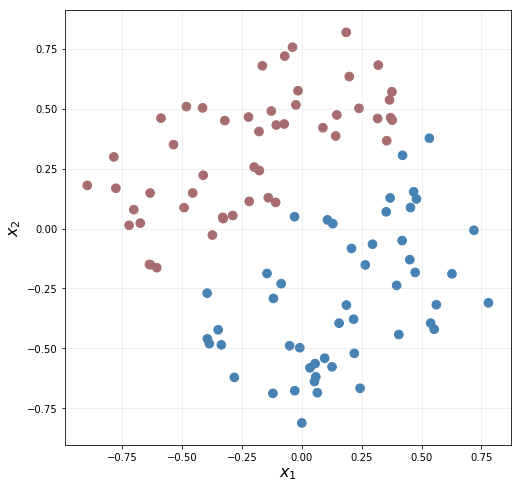

In [198]:
margin = 0.04 #subject to experiment

perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

#test = Perceptron(n=100, margin=margin)
#test.use_sklearn() 

YOUR ANSWER HERE

**Part 4 B** : Modify the train method in the Perceptron class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

visit all training examples in a random shuffled order over each training epoch
terminate when you perform an entire epoch without making a single classification error on the training data
use the self.num_mistakes counter to count the total number of classification errors that are made over the entire training process


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the max_epochs parameter right away. Later we'll look at training sets that will terminate on their own, but implementing this stop will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [199]:
%run -i tests2.py "prob 1A"

TestNegMistake (__main__.TestPerceptron) ... ok
TestPosMistake (__main__.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


**Part 4 C** : Modify the plot_model method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot.


After 25 epochs, The algroithm was able to find weights ( [-5.11378876  8.72130501] ) and bias  -1 with 0 mistakes.

Epoch:  10 	weight: [-2.80047866  6.98782515] 	bias: -1 	Mistakes: 7
Epoch:  20 	weight: [-4.54265907  8.44079601] 	bias: 0 	Mistakes: 7

After 25 epochs, The algroithm was able to find weights ( [-5.11378876  8.72130501] ) and bias  -1 with 0 mistakes.


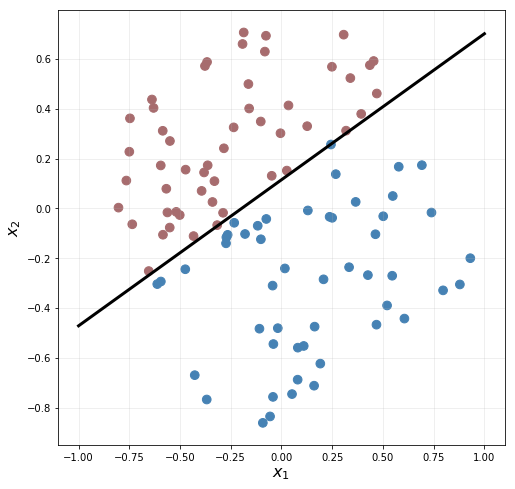

In [200]:
perc = Perceptron(n=100, margin=0.0000025,random_state=330)
perc.train()
perc.plot_model(decision_boundary=True)

**Part 5** : 

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron Training Algorithm will complete after making at most $1/M^2$ classification mistakes

Do the following to verify the above statement: 
- train perceptron with $n = 100$ and different margin's ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and average number of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes

In [201]:
## IGNORE PRINT STATEMENTS

m = []
mistakes = [] # storing mistakes
margin_inverse = [1/0.3 , 1/0.1 , 1/0.01 , 1/0.001 , 1/0.0001]

print("\nmargin: 0.3")
# margin: 0.3
for i in range(100):
    
    perc = Perceptron(n=100, margin=0.3,random_state=np.random.randint(1,10))
    perc.train()
    for to_avg in perc.to_average:
        m.append(to_avg)
    

print("\nmistakes after 20 runs:",m,"\n")

mistakes.append(np.mean(m))
m = []

print("\nmargin: 0.1")
# margin: 0.1
for i in range(100):  
    perc = Perceptron(n=100, margin=0.1,random_state=np.random.randint(1,10))
    perc.train()
    for to_avg in perc.to_average:
        m.append(to_avg)
    
    
print("\nmistakes after 20 runs:",m,"\n")
mistakes.append(np.mean(m))
m = []

print("\nmargin: 0.01")

# margin: 0.01
for i in range(100): 
    perc = Perceptron(n=100, margin=0.01,random_state=np.random.randint(1,10))
    perc.train()
    for to_avg in perc.to_average:
        m.append(to_avg)
    

print("\nmistakes after 20 runs:",m,"\n")
mistakes.append(np.mean(m))
m = []

print("\nmargin: 0.001")
# margin: 0.001
for i in range(100): 
    perc = Perceptron(n=100, margin=0.001,random_state=np.random.randint(1,10))
    perc.train()
    for to_avg in perc.to_average:
        m.append(to_avg)
    
print("\nmistakes after 20 runs:",m,"\n")
mistakes.append(np.mean(m))
m = []
print("\nmargin: 0.0001")
# margin: 0.0001

for i in range(100): 
    perc = Perceptron(n=100, margin=0.0001,random_state=np.random.randint(1,10))
    perc.train()
    for to_avg in perc.to_average:
        m.append(to_avg)
    

print("\nmistakes after 20 runs:",m,"\n")
mistakes.append(np.mean(m))
m = []



margin: 0.3

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396358  1.53543397] ) and bias  0 with 0 mistakes.

After 2 epochs, The algroithm was able to find weights ( [-0.48396

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.66850699] ) and bias  0 with 0 mistakes.

After 4 epochs, The algroithm was able to find weights ( [-1.53464894  2.6685069

Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mi

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mista

Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.64956352  7.14145709] 	bias: 1 	Mistakes: 2
Epoch:  20 	weight: [-4.29987715  7.86144161] 	bias: 1 	Mistakes: 2

After 22 epochs, The algroithm was able to find weights ( [-4.35283729  7.89043468] ) and bias  1 with 0 mi

Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.6350

Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.2751

Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.2751

Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741985 ] 	bias: 1 	Mistakes: 8
Epoch:  20 	weight: [-4.30229047  8.27510422] 	bias: 1 	Mistakes: 4
Epoch:  30 	weight: [-4.91202913  8.63502382] 	bias: 1 	Mistakes: 0

After 30 epochs, The algroithm was able to find weights ( [-4.91202913  8.63502382] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-3.22593584  7.1741

Epoch:  40 	weight: [-4.78261788  9.64242076] 	bias: 1 	Mistakes: 6
Epoch:  50 	weight: [ -5.9416755   10.02891963] 	bias: 1 	Mistakes: 6
Epoch:  60 	weight: [ -6.57539749  10.82910311] 	bias: 1 	Mistakes: 4
Epoch:  70 	weight: [ -6.60428952  11.82480715] 	bias: 1 	Mistakes: 5
Epoch:  80 	weight: [ -7.43588059  12.74745947] 	bias: 2 	Mistakes: 9
Epoch:  90 	weight: [ -7.49277896  14.36182592] 	bias: 1 	Mistakes: 8
Epoch:  100 	weight: [ -7.86696873  15.10595208] 	bias: 2 	Mistakes: 5
Epoch:  10 	weight: [-2.98352963  5.94465653] 	bias: 1 	Mistakes: 10
Epoch:  20 	weight: [-4.08131605  7.9119929 ] 	bias: 1 	Mistakes: 8
Epoch:  30 	weight: [-5.62055398  8.26281035] 	bias: 1 	Mistakes: 4

After 33 epochs, The algroithm was able to find weights ( [-5.15208173  8.72201665] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.40390975  4.86370729] 	bias: 0 	Mistakes: 4
Epoch:  20 	weight: [-2.09953586  6.52017894] 	bias: 1 	Mistakes: 4

After 29 epochs, The algroithm was able to find weigh

After 29 epochs, The algroithm was able to find weights ( [-3.19520487  6.77926559] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.97438262  6.27321816] 	bias: 0 	Mistakes: 5
Epoch:  20 	weight: [-4.01631347  7.25966126] 	bias: 1 	Mistakes: 3

After 26 epochs, The algroithm was able to find weights ( [-4.04211067  7.88319913] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.98352963  5.94465653] 	bias: 1 	Mistakes: 10
Epoch:  20 	weight: [-4.08131605  7.9119929 ] 	bias: 1 	Mistakes: 8
Epoch:  30 	weight: [-5.62055398  8.26281035] 	bias: 1 	Mistakes: 4

After 33 epochs, The algroithm was able to find weights ( [-5.15208173  8.72201665] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.40390975  4.86370729] 	bias: 0 	Mistakes: 4
Epoch:  20 	weight: [-2.09953586  6.52017894] 	bias: 1 	Mistakes: 4

After 29 epochs, The algroithm was able to find weights ( [-3.19520487  6.77926559] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.97438262  6.27321816] 	bias: 0 	Mist

After 29 epochs, The algroithm was able to find weights ( [-3.19520487  6.77926559] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.97438262  6.27321816] 	bias: 0 	Mistakes: 5
Epoch:  20 	weight: [-4.01631347  7.25966126] 	bias: 1 	Mistakes: 3

After 26 epochs, The algroithm was able to find weights ( [-4.04211067  7.88319913] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.98352963  5.94465653] 	bias: 1 	Mistakes: 10
Epoch:  20 	weight: [-4.08131605  7.9119929 ] 	bias: 1 	Mistakes: 8
Epoch:  30 	weight: [-5.62055398  8.26281035] 	bias: 1 	Mistakes: 4

After 33 epochs, The algroithm was able to find weights ( [-5.15208173  8.72201665] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.40390975  4.86370729] 	bias: 0 	Mistakes: 4
Epoch:  20 	weight: [-2.09953586  6.52017894] 	bias: 1 	Mistakes: 4

After 29 epochs, The algroithm was able to find weights ( [-3.19520487  6.77926559] ) and bias  1 with 0 mistakes.
Epoch:  10 	weight: [-2.97438262  6.27321816] 	bias: 0 	Mist

[2.0, 3.5024875621890548, 6.5411764705882351, 6.9666666666666668, 5.1900798934753665]


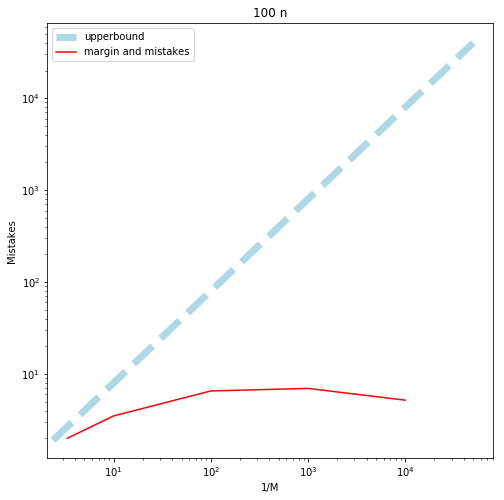

In [204]:
print(mistakes)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.plot(np.linspace(0, 50000, 20),np.linspace(0, 40000, 20),lw=7,color="lightblue",ls ="--",label="upperbound")

ax.plot(margin_inverse,mistakes,color="red",label="margin and mistakes")
ax.set_xlabel("1/M")
ax.set_ylabel("Mistakes")
ax.set_title("100 n")

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()





#[2.0, 4.0, 5.8529411764705879, 6.1489361702127656, 6.4565217391304346]
#[2.0, 3.5024875621890548, 6.5411764705882351, 6.9666666666666668, 5.1900798934753665]


# Real upper bound is at 4 but I set it to 4.035 so it would be easly visible 

** 

* Explain the limitations of the vanilla perceptron implemented above.
* Provide pseudo code/steps to implememt Voting perceptron or Average Perceptron and discuss the pros and cons (Compare space complexity)

$$ \hat{y} = sign( \sum_{k=1}^{K} c^{(k)} sign( w^{(k)} \bullet \hat{x} + b^{(k)})) $$

### Logistic Regression + SGD

In this Problem, you'll implement a Logistic Regression classifier to predict whether person on titanic will survive or not.


Dataset has following attributes:

|Variable|Definition|Key|
|:----:|:----:|:---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	| Sex|	male, female|
|Age |Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	||
|fare	|Passenger fare|	|
|embarked | Port of Embarkation | one hot encoded C = Cherbourg, Q = Queenstown, S = Southampton|



**Part 1** : Firstly implement the sigmoid function to return the output by applying the sigmoid function to the input
parameter.

In [205]:
from math import exp, log

def sigmoid(score, threshold=20.0):
    """
    Sigmoid function with a threshold
    :param score: A real valued number to convert into a number between 0 and 1
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    

    SCORE = threshold if (score > threshold) else -threshold if (score < -threshold) else score
    out = 1.0/(1.0 + math.exp(-SCORE))
    
    return out

In [206]:
#for grading - ignore

Following is a class to load titanic dataset.

In [207]:
# Make sure you have install pandas and numpy before you run.
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from collections import defaultdict

class Dataset:
    """
    Class to load dataset containing titanic survival features
    """

    def __init__(self, location, random_state=1241):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        np.random.seed(random_state)
        f = gzip.open(location, 'rb')
        self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)
        f.close()
        print('Train set : ', len(self.train_x))
        
    @staticmethod
    def shuffle(X, y):
        """ Shuffle training data """
        shuffled_indices = np.random.permutation(len(y))
        return X[shuffled_indices], y[shuffled_indices]

**Part 2** :

**Part A** : Using *sigmoid* function implemented earlier, Finish the *sgd_update* function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly without regularization provided by : 

$$
\textrm{NLL}({\bf \beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \textrm{sigm}(\boldsymbol{\beta}^T{\bf x})       + (1-y_i)\log(1 - \textrm{sigm}(\boldsymbol{\beta}^T{\bf x}))\right] 
$$


In [208]:
import math
class LogReg:
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: A function that takes the iteration as an argument (the default is a constant value)
        """
        self.w = np.zeros(num_features)
        self.eta = eta

    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, compute the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """

        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += math.log(p)
            else:
                logprob += math.log(1.0 - p)

            # Get accuracy
            if abs(y - p) <= 0.5:
                num_right += 1

        return logprob, float(num_right) / float(len(examples_y))

    def sgd_update(self, x_i, y, lam = 0.0):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :param lam : regularization term
        :return: Return the new value of the regression coefficients
        """

        # UPDATING Weights
        pi = sigmoid(np.dot(self.w,x_i))
        self.w[0] = self.w[0] + self.eta*( y - pi )
        for ii in range(1,len(self.w)):
            self.w[ii] = self.w[ii] - self.eta*( 2*lam*self.w[ii] - (y - pi)*x_i[ii])
        
        return self.w
        

In [209]:
%run -i tests2.py "prob 2A"
# Positve: weights gotta be [1.0000335350130467,1.0000670700260932,1.0001676750652333]
# Negative: weights gotta be [0.80002467891519724,-0.19985192650881656 ,0.60004935783039448]



testPosUnregUpdate (__main__.TestLogReg) ... ok
testNegUnregUpdate (__main__.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


**PART B**: Complete the following code below to loop over the training data and perform stochastic gradient descent for the pre-defined number of epoch.

Try different combinations of epochs, learning rate and regularization term.


In [210]:
# TODO redefine learning rate and epochs accordingly
eta  = 1e-3
epochs = 500


In [211]:
dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)
print('Train Data :', dataset_handler.train_x.shape)
print('Test Data :', dataset_handler.test_x.shape)
# Iterations
iteration = 0
accuracy_array_25 = []
accuracy_array = []

logProb_train = acc_train = logProb_test = acc_test = 0
for epoch in range(epochs):
    # TODO: Finish the code to loop over the training data and perform a stochastic
    # gradient descent update on each training example.
    # NOTE: It may be helpful to call upon the 'progress' method in the LogReg
    # class to make sure the algorithm is truly learning properly on both training and test data
        
    # YOUR CODE HERE
    dataset_handler.train_x , dataset_handler.train_y = Dataset.shuffle(dataset_handler.train_x,dataset_handler.train_y)
    
    
    for ii in range(len(dataset_handler.train_x)):
        lr.sgd_update(dataset_handler.train_x[ii],dataset_handler.train_y[ii])
    
    
    
    logProb_train, acc_train = lr.progress(dataset_handler.train_x , dataset_handler.train_y)
    logProb_test, acc_test = lr.progress(dataset_handler.test_x , dataset_handler.test_y)
    
    
    accuracy_array.append(acc_train)
    if(epoch % 20 == 0):
        accuracy_array_25.append(acc_train)
    
    
    if( epoch % 100 == 0):
        print("\nEpoch",epoch, "\t Training Accuracy: ",acc_train)
        print("Epoch",epoch, "\t Testing Accuracy: ",acc_test)
        
    
    


Train set :  796
Train Data : (796, 10)
Test Data : (200, 10)

Epoch 0 	 Training Accuracy:  0.5
Epoch 0 	 Testing Accuracy:  0.52

Epoch 100 	 Training Accuracy:  0.7361809045226131
Epoch 100 	 Testing Accuracy:  0.735

Epoch 200 	 Training Accuracy:  0.7160804020100503
Epoch 200 	 Testing Accuracy:  0.72

Epoch 300 	 Training Accuracy:  0.7537688442211056
Epoch 300 	 Testing Accuracy:  0.74

Epoch 400 	 Training Accuracy:  0.6469849246231156
Epoch 400 	 Testing Accuracy:  0.635


**Part C** Report train and test accuracy for the above experiments after 500 epochs with eta = 1e-3.

In [213]:
print("weights after 500 epoch:\n",lr.w)

print("\n\tlog Probality for training set:",logProb_train)
print("\tAccuracy for training set:",acc_train)
print("\n\tlog Probality for Test set:",logProb_test)
print("\tAccuracy for Test set:",acc_test) 

weights after 500 epoch:
 [ 0.27553317 -0.02615899 -1.04892398 -0.54118218  0.06755792  1.97181858
 -1.69628541  0.14727151 -0.85564121  0.98390287]

	log Probality for training set: -559.9411463461689
	Accuracy for training set: 0.7613065326633166

	log Probality for Test set: -136.50828929248172
	Accuracy for Test set: 0.725


**Part D** What is the role of the learning rate (eta) and number of epochs? (Provide plots of train accuracy vs. $\eta$, train accuracy vs number of epochs)

**The role of learning rate is to ajust how much we update the weights in the directoion to decrease the gradient**

**one epoch is one iteration of going through teh whole dataset**


In [214]:
eta  = 0.1
epochs = 500

dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)

# Iterations
eta_array = []
accuracy_array2 = []
eta_array_25 = []
accuracy_array2_25 = []

    
logProb_train = acc_train = logProb_test = acc_test = 0

for i in range(epochs):
    
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    
    #updating eta
    eta += .0005
    eta_array.append(eta)
    
    dataset_handler.train_x , dataset_handler.train_y = Dataset.shuffle(dataset_handler.train_x,dataset_handler.train_y)

    for ii in range(len(dataset_handler.train_x)):
        lr.sgd_update(dataset_handler.train_x[ii],dataset_handler.train_y[ii])

    logProb_train, acc_train = lr.progress(dataset_handler.train_x , dataset_handler.train_y)
    logProb_test, acc_test = lr.progress(dataset_handler.test_x , dataset_handler.test_y)


    accuracy_array2.append(acc_train)  
    if(i % 20 == 0):
        eta_array_25.append(eta)
        accuracy_array2_25.append(acc_train)
        


Train set :  796


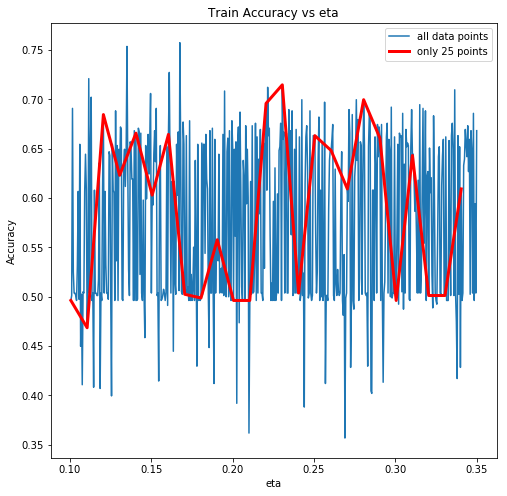

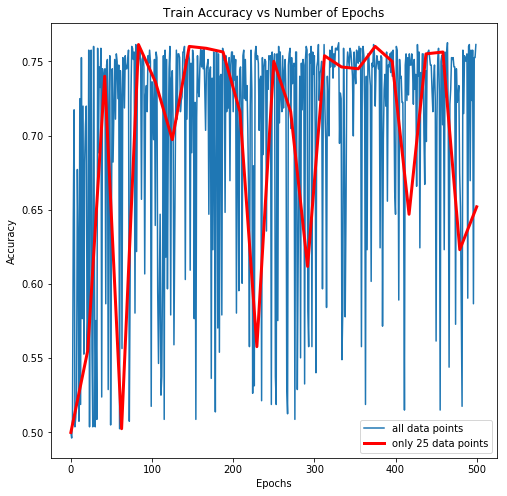

In [217]:
# PLOTING training accuracy vs eta

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.plot(eta_array,accuracy_array2,label="all data points")
ax.plot(eta_array_25,accuracy_array2_25,color="red",lw=3,label="only 25 points")
ax.set_ylabel("Accuracy")
ax.set_xlabel("eta")
ax.set_title("Train Accuracy vs eta")
ax.legend()


# PLOTING training accuracy vs number of epochs
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.plot(range(500),accuracy_array,label="all data points")
ax.plot(np.linspace(0,500,25),accuracy_array_25,color="red",lw=3,label="only 25 data points")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs")
ax.set_title("Train Accuracy vs Number of Epochs")
ax.legend()



**Part E**: Update your implementation of the *sgd_update* method so that it performs regularized SGD updates of the model parameters to minimize the regularized loss function

$$
\textrm{Loss}({\bf \beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \textrm{sigm}(\boldsymbol{\beta}^T{\bf x})       + (1-y_i)\log(1 - \textrm{sigm}(\boldsymbol{\beta}^T{\bf x}))\right] + \lambda\displaystyle\sum_{k=1}^p \beta_k^2
$$

Note that you should NOT regularize the bias parameter $\beta_0$.

Provide train and test accuracy after above change with lam=1e-5.

In [218]:
%run -i tests2.py "prob 2B"

testNegRegUpdate (__main__.TestLogReg) ... ok
testPosRegUpdate (__main__.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


**Part F** what is the effect of regularization term with respect to accuracy? (Provide plots of accuracy vs. $\lambda$)

In [219]:
lam  = 1e-3
epochs = 500

dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)

# Iterations
lam_array = []
accuracy_array3 = []

lam_array25 = []
accuracy_array3_25 = []

logProb_train = acc_train = logProb_test = acc_test = 0

for i in range(epochs):
    
    lr = LogReg(dataset_handler.train_x.shape[1], .5)
    
    #updating eta
    lam += .005
    lam_array.append(lam)
    
    dataset_handler.train_x , dataset_handler.train_y = Dataset.shuffle(dataset_handler.train_x,dataset_handler.train_y)

    for ii in range(len(dataset_handler.train_x)):
        lr.sgd_update(dataset_handler.train_x[ii],dataset_handler.train_y[ii],lam)

    logProb_train, acc_train = lr.progress(dataset_handler.train_x , dataset_handler.train_y)
    logProb_test, acc_test = lr.progress(dataset_handler.test_x , dataset_handler.test_y)


    accuracy_array3.append(acc_train)  
    if(i % 20 == 0):
        lam_array25.append(lam)
        accuracy_array3_25.append(acc_train)
        


Train set :  796


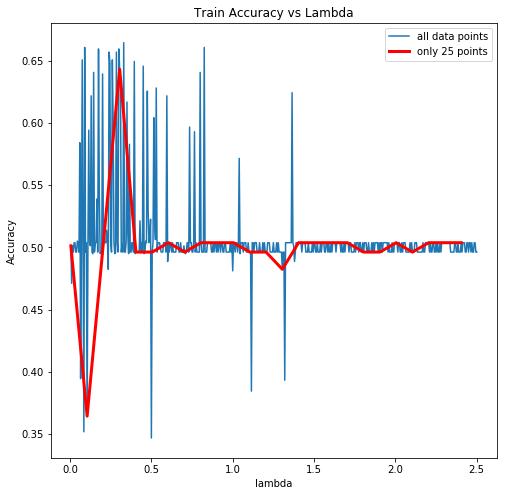

In [220]:

# PLOTING training accuracy vs lambda
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.plot(lam_array,accuracy_array3,label="all data points")
ax.plot(lam_array25,accuracy_array3_25,color="red",lw=3,label="only 25 points")
ax.legend()

ax.set_ylabel("Accuracy")
ax.set_xlabel("lambda")
ax.set_title("Train Accuracy vs Lambda")



**Part 3** 

Time based Learning Rate is dynamic learning rate given the following equation

$LearningRate = \eta / (1 + decay * current epoch)$

Train SGD with dynamic learning rate defined above and provide the following details:
* use initial learning rate ($\eta$) as 0.1.
* use decay as 0.001.
* Update learning rate every epoch (lr.eta).
* plot of Train Accuracy and learning rate for each epoch.


Train set :  796


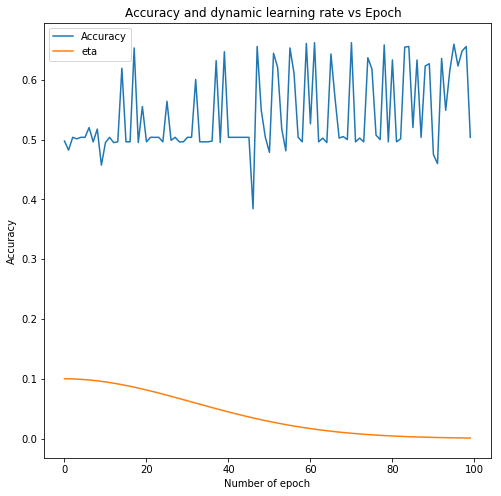

In [221]:
eta  = 1e-1
epochs = 100
dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)

DECAY = 0.001

# Iterations
iteration = 0
accuracy_array4 = []
eta_array4 =[]
for epoch in range(epochs):
    # TODO: Finish the code to loop over the training data and perform a stochastic
    # gradient descent update on each training example.
    # NOTE: It may be helpful to call upon the 'progress' method in the LogReg
    # class to make sure the algorithm is truly learning properly on both training and test data
    
    
    #UPDATING learning rate
    learningRate = lr.eta / (1 + DECAY*epoch)
    lr.eta = learningRate
    eta_array4.append(learningRate)
    
    dataset_handler.train_x , dataset_handler.train_y = Dataset.shuffle(dataset_handler.train_x,dataset_handler.train_y)

    for ii in range(len(dataset_handler.train_x)):
        lr.sgd_update(dataset_handler.train_x[ii],dataset_handler.train_y[ii],lam)

    logProb_train, acc_train = lr.progress(dataset_handler.train_x , dataset_handler.train_y)
    logProb_test, acc_test = lr.progress(dataset_handler.test_x , dataset_handler.test_y)

    accuracy_array4.append(acc_train)
    
    
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.plot(range(100),accuracy_array4,label="Accuracy")
ax.plot(range(100),eta_array4,label="eta")
ax.set_xlabel("Number of epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy and dynamic learning rate vs Epoch  ")
ax.legend()
    